# Configs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# Funtion

In [ ]:
def quantify_missing_data_by_group(data, feature_group):
    """
    Quantify missing data for a specific group of features.
    Args:
        data (pd.DataFrame): The input dataset.
        feature_group (list): A list of features to analyze.
    Returns:
        pd.DataFrame: A summary of missing values for the feature group.
    """
    missing_count = data[feature_group].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100

    summary = pd.DataFrame({
        'Feature': feature_group,
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    }).sort_values(by='Missing Percentage', ascending=False)

    # Plot missing percentages
    summary[summary['Missing Percentage'] > 0].set_index('Feature').plot(
        kind='bar',
        y='Missing Percentage',
        legend=False,
        title=f'Percentage of Missing Values by Feature in Group',
        figsize=(10, 6)
    )
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

    return summary

In [ ]:
def clean_float_column(df, column_name):
    """
    Cleans a float column in a Pandas DataFrame by:
    - Removing excess characters from numeric values.
    - Replacing values containing only characters with NaN.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to clean.

    Returns:
        pd.DataFrame: The DataFrame with the cleaned column.
    """
    def clean_value(value):
        try:
            # Try to extract a float from the value
            return float(''.join(ch for ch in str(value) if ch.isdigit() or ch == '.' or ch == '-'))
        except ValueError:
            # If conversion fails, return NaN
            return np.nan

    # Apply the cleaning function to the column
    df[column_name] = df[column_name].apply(clean_value)

    return df

In [ ]:
def convert_credit_history_to_float(df, column_name):
    """
    Converts a column with values like '(number) years and (number) months' into float values.
    Example: '29 years and 6 months' -> 29.5

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to convert.

    Returns:
        pd.DataFrame: The DataFrame with the converted column.
    """
    def parse_credit_history(value):
        try:
            # Extract years and months from the string
            parts = str(value).lower().replace('and', '').split()
            years = int(parts[0]) if 'year' in parts[1] else 0
            months = int(parts[2]) if len(parts) > 2 and 'month' in parts[3] else 0
            return years + months / 12.0
        except (IndexError, ValueError):
            return np.nan

    df[column_name] = df[column_name].apply(parse_credit_history)
    return df

In [ ]:
def plot_feature_distribution_by_target(data, features, target_column='Credit_Score', fill=True, alpha=0.3):
    num_features = len(features)

    if num_features == 0:
        print("No features provided for visualization.")
        return

    plt.figure(figsize=(12, 6 * ((num_features + 1) // 2)))

    for i, feature in enumerate(features):
        if feature not in data.columns:
            print(f"Feature '{feature}' not found in the dataset. Skipping...")
            continue

        plt.subplot((num_features + 1) // 2, 2, i + 1)
        sns.kdeplot(data.loc[data[target_column] == 0, feature], label=f'{target_column} == 0', color='blue')
        sns.kdeplot(data.loc[data[target_column] == 1, feature], label=f'{target_column} == 1', color='red')
        plt.title(f'Distribution of {feature} by {target_column}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def reconvert_to_years_months(value):
    if pd.isna(value):
        return None
    years = int(value)
    months = int(round((value - years) * 12))
    return f"{years} Years and {months} Months"

# Import

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/NCKH 2024/data - NCKH-NEU/train.csv")
df = pd.read_csv("/content/drive/MyDrive/NEU/NCKH 2024/data - NCKH-NEU/train.csv")

<ipython-input-8-2d516e5b6dc8>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/NEU/NCKH 2024/data - NCKH-NEU/train.csv")


In [ ]:
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


# Preprocessing

The dataset is focused on a **Credit Score classification problem**. The company has collected basic banking details along with extensive credit-related information. The management aims to develop an intelligent system to categorize individuals into credit score brackets, thereby minimizing manual effort.

Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

The data includes
*   **Categorical information:** Occupation, Payment behaviour, Payment
*   **Numerical information:** Age, Annual income, Monthly inhand salary, Number of bank accounts, Number of credit card, Interest rate, Number of loan, Number of days delayed from due date payment, Number of delayed payment, Percentage change in credit card limit, Number of credit card inquiries, Outstanding Debt, Credit utilazation, Total EMI per month, Amount of monthly investment, Monthly balance
*   **Text information:** Type of Loan, Age of credit history

The **Credit Score** is classified into three, **'Good', 'Standard', and 'Poor'**. However, to simplify the results, **'Good'** is merged into **'Standard'**, turning into 2 classes.



## Preprocessing - Training data

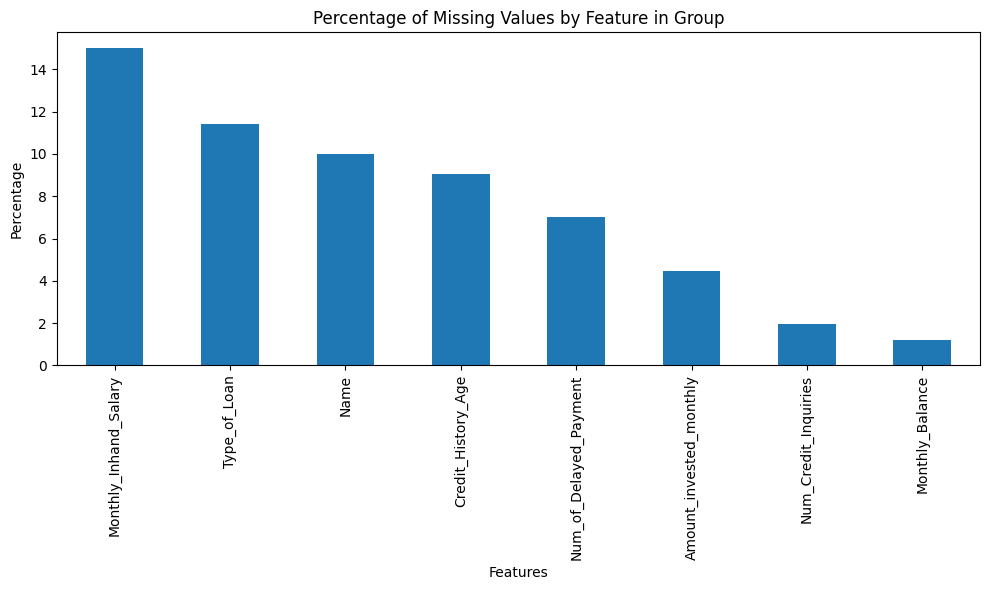

,Feature,Missing Count,Missing Percentage
Monthly_Inhand_Salary,Monthly_Inhand_Salary,15002,15.002
Type_of_Loan,Type_of_Loan,11408,11.408
Name,Name,9985,9.985
Credit_History_Age,Credit_History_Age,9030,9.030
Num_of_Delayed_Payment,Num_of_Delayed_Payment,7002,7.002
Amount_invested_monthly,Amount_invested_monthly,4479,4.479
Num_Credit_Inquiries,Num_Credit_Inquiries,1965,1.965
Monthly_Balance,Monthly_Balance,1200,1.200
ID,ID,0,0.000
Changed_Credit_Limit,Changed_Credit_Limit,0,0.000


In [ ]:
quantify_missing_data_by_group(df, df.columns)

In [ ]:
df['Credit_Score'] = df['Credit_Score'].map({'Good': 'Standard', 'Standard': 'Standard', 'Poor': 'Non-standard'})

In [ ]:
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,71002
Non-standard,28998


<Axes: xlabel='Credit_Score'>

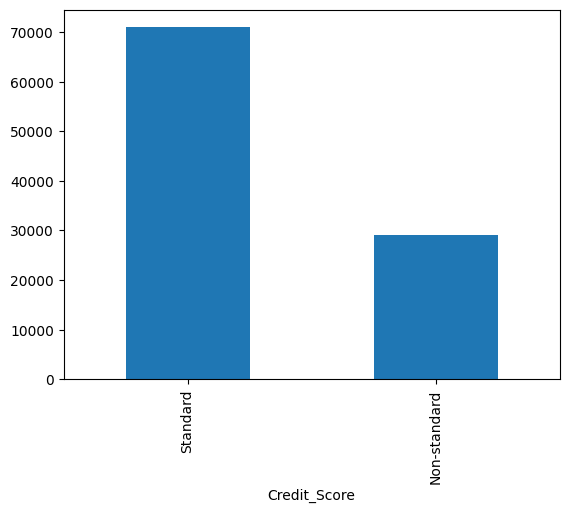

In [ ]:
df['Credit_Score'].value_counts().plot(kind ='bar')

### Data cleaning

The raw data contains many special characters, either added to the values or used to indicate missing data. In this step, we standardize the dataset by cleaning and formatting these values.



*   **Occupation:** '_______' is turned into missing values or NaN


*   **Num_of_Loan:** The number of loans can not be '-100' so it is turned into NaN

*   **'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Annual_Income':** These features are numerical but have added characters such as '_' next to the values, those characters are removed from the values
*   **Number_Banks_Accounts and Num_of_Delayed_Payment:** The number of accounts can not be '-1' so it is turned into NaN
*   **Payment_Behaviour:** '!@9#%8' is turn to NaN
*   **Monthly_Balance:** '\_\_-333333333333333333333333333__' is turn to NaN



In [ ]:
df[df['Occupation'] == '_______']
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [ ]:
wrong_cols = ['Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
        'Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Annual_Income']
for col in wrong_cols:
  clean_float_column(df, col)

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
df['Num_of_Loan'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)


### Transform

**Object to Float:** Features that previously contained unnecessary characters are stored as Object type. We convert these features back to Float after cleaning.

**'Credit_History_Age':** Values in this feature is in '(number) years and (number) months' format, we convert this into Float

In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce', downcast='float')

In [ ]:
convert_credit_history_to_float(df, 'Credit_History_Age')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High spent Small value payments,312.494080,Standard
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low spent Large value payments,284.629150,Standard
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3.0,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low spent Medium value payments,331.209869,Standard
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low spent Small value payments,223.451309,Standard
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High spent Medium value payments,341.489227,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,_,502.38,34.663572,31.500000,No,35.104023,60.971333,High spent Large value payments,479.866241,Non-standard
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,_,502.38,40.565631,31.583333,No,35.104023,54.185950,High spent Medium value payments,496.651611,Non-standard
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6,5729,2.0,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High spent Large value payments,516.809082,Non-standard
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,Low spent Large value payments,319.164978,Standard


### Fill NaN

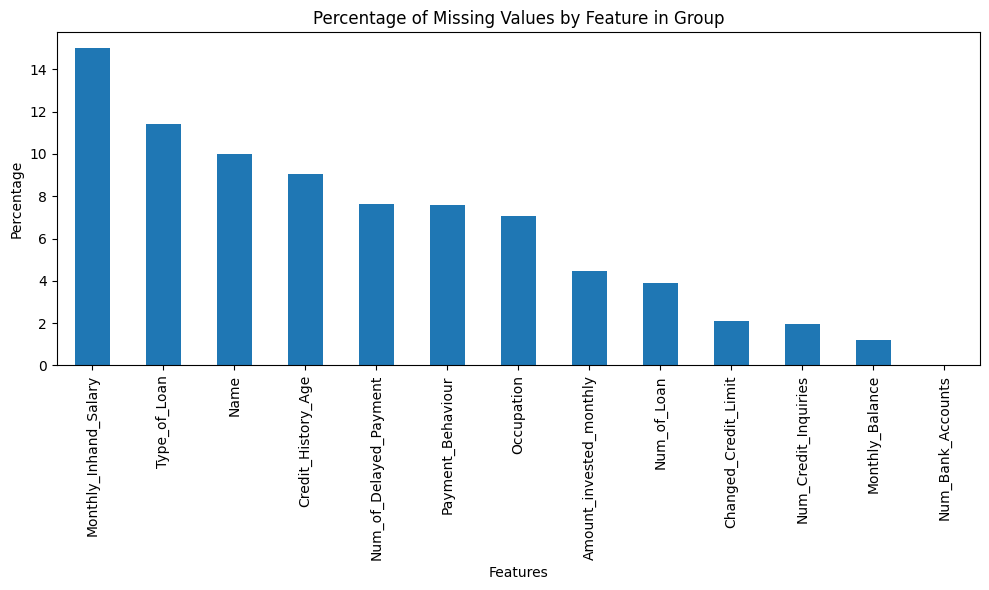

,Feature,Missing Count,Missing Percentage
Monthly_Inhand_Salary,Monthly_Inhand_Salary,15002,15.002
Type_of_Loan,Type_of_Loan,11408,11.408
Name,Name,9985,9.985
Credit_History_Age,Credit_History_Age,9030,9.030
Num_of_Delayed_Payment,Num_of_Delayed_Payment,7646,7.646
Payment_Behaviour,Payment_Behaviour,7600,7.600
Occupation,Occupation,7062,7.062
Amount_invested_monthly,Amount_invested_monthly,4479,4.479
Num_of_Loan,Num_of_Loan,3876,3.876
Changed_Credit_Limit,Changed_Credit_Limit,2091,2.091


In [ ]:
quantify_missing_data_by_group(df, df.columns)

To enhance efficiency, NaN are filled based on each **'Customer_ID'**, not the entire data set.


*   Use mean to fill for Numerical features
*   Use mode to fill for Categorical features

**'Type_of_Loan'**, the value is usually missing when **'Num_of_Loan'** is 0, no loans at all, so the missing values is filled with 'No Loan' to indicate it. The remaining missing values is filled as **'Not Specified'**, since the customer might not want to disclose it.

 **'Credit_History_Age'** are filled based on the **'Customer_ID'** and **'Month'**. Since the recorded months are sequential with no gaps, missing values are computed by adding 1 month (1/12 or 0.0833 month) to the previous **'Credit_History_Age'** if the missing value corresponds to the next sequential month or subtracting 1 month from the following **'Credit_History_Age'** if the missing value corresponds to a previous month.

In [ ]:
miss_num_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
            'Amount_invested_monthly', 'Changed_Credit_Limit',
            'Num_Credit_Inquiries', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_of_Loan']
for col in miss_num_cols:
  df[col] = df.groupby('Customer_ID')[col].transform(
      lambda x:x.fillna(x.mean())
  )

miss_cat_cols = ['Occupation', 'Payment_Behaviour']
for col in miss_cat_cols:
  df[col] = df.groupby('Customer_ID')[col].transform(
      lambda x:x.fillna(x.mode()[0])
  )

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


#### Type of Loan

In [ ]:
df[df['Num_of_Loan'] == 0]['Customer_ID'].count()

11332

In [ ]:
df.loc[df['Num_of_Loan'] == 0, 'Type_of_Loan'] = 'No Loan'

In [ ]:
df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].transform(
    lambda x: x.fillna('Not Specified')
)

#### Credit_History_Age

In [ ]:
# Fill missing values in column "Credit_History_Age"
def fill_credit_age(group):
    for _ in range(4):
        for i in range(len(group)):
            if pd.isna(group['Credit_History_Age'].iloc[i]):
                # Case where there is a previous value (fill forward)
                if i > 0 and not pd.isna(group['Credit_History_Age'].iloc[i - 1]):
                    previous_age = group['Credit_History_Age'].iloc[i - 1]
                    group.loc[group.index[i], 'Credit_History_Age'] = previous_age + 1 / 12
                elif i == 0 or pd.isna(group['Credit_History_Age'].iloc[i - 1]):
                    # Look ahead to the next available value and calculate backwards
                    if i + 1 < len(group) and not pd.isna(group['Credit_History_Age'].iloc[i + 1]):
                        next_age = group['Credit_History_Age'].iloc[i + 1]
                        group.loc[group.index[i], 'Credit_History_Age'] = next_age - 1 / 12
    return group

df = df.groupby('Customer_ID', group_keys=False).apply(fill_credit_age)

<ipython-input-29-128510b7c302>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID', group_keys=False).apply(fill_credit_age)


This step is preparation for preprocessing the display dataset.

In [ ]:
dis = df.copy()
train_to_drop = ['ID', 'Month', 'Name', 'SSN', 'Credit_Mix']
dis_to_drop = ['SSN', 'Credit_Mix']
df.drop(columns=train_to_drop, inplace=True)
dis.drop(columns=dis_to_drop, inplace=True)

### Encoding categorical columns

**Categorical features** are encoded using a Label Encoder, which assigns a unique numeric value to each category within the feature. This transformation converts categorical data into a numeric format suitable for machine learning models while preserving the relationship between the categories and their labels.

**'Type_of_Loan'** is encode differently, since the value might contains only one or multiple type of loan at the same time, it is unsuitable to use Label encoder. Each loan type is extracted by cleaning and splitting the values in the Type_of_Loan column. For each unique loan type, a new column is created in the DataFrame. Each new column is populated with 1 if the corresponding loan type is present in the Type_of_Loan value for that row and 0 otherwise.

**'Credit_Score'** is encoded such that "Standard" is assigned to a value of 0 and "Non-standard" is assigned to a value of 1 (the possitive class).

In [ ]:
df.select_dtypes(exclude = 'number').columns

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [ ]:
cat_cols = ['Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount']
for col in cat_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
No Loan,11332
Not Specified,1484
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
...,...
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8


In [ ]:
unique_loans = set()
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)

for loans in df['Type_of_Loan']:
    # Clean and split the loan types properly
    loan_items = [item.strip() for item in loans.replace(' and', '').split(',')]
    unique_loans.update(loan_items)
# Sort the unique loan types
unique_loans = sorted(unique_loans)

# Step 2: One-Hot Encoding
for loan_type in unique_loans:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: 1 if loan_type in x.replace(' and ', ',') else 0)

# Drop the original 'Type_of_Loan' column if no longer needed
df = df.drop('Type_of_Loan', axis=1)

In [ ]:
unique_loans

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

In [ ]:
# bool_col = ['Auto Loan',
#  'Credit-Builder Loan',
#  'Debt Consolidation Loan',
#  'Home Equity Loan',
#  'Mortgage Loan',
#  'No Loan',
#  'Not Specified',
#  'Payday Loan',
#  'Personal Loan',
#  'Student Loan']

bool_col = unique_loans

df[bool_col]=df[bool_col].astype(bool)

In [ ]:
df['Credit_Score'] = (
    df['Credit_Score']
    .replace({
        'Non-standard': 1,
        'Standard': 0
    })
)

<ipython-input-38-e724d39e4225>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


### Save Train Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Outstanding_Debt          100000 non-null  float64

In [ ]:
df.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,CUS_0xd40,23.0,12,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,22.083333,1,49.574949,80.415295,2,312.494080,0,True,True,False,True,False,False,False,False,True,False
1,CUS_0xd40,23.0,12,19114.12,1824.843333,3.0,4,3,4.0,-1,6.0,11.27,4.0,809.98,31.944960,22.166667,1,49.574949,118.280222,3,284.629150,0,True,True,False,True,False,False,False,False,True,False
2,CUS_0xd40,-500.0,12,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,10.27,4.0,809.98,28.609352,22.250000,1,49.574949,81.699521,4,331.209869,0,True,True,False,True,False,False,False,False,True,False
3,CUS_0xd40,23.0,12,19114.12,1824.843333,3.0,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,22.333333,1,49.574949,199.458074,5,223.451309,0,True,True,False,True,False,False,False,False,True,False
4,CUS_0xd40,23.0,12,19114.12,1824.843333,3.0,4,3,4.0,6,6.0,11.27,4.0,809.98,24.797347,22.416667,1,49.574949,41.420153,1,341.489227,0,True,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,9,39628.99,3359.415833,4.0,6,7,2.0,23,7.0,11.50,3.0,502.38,34.663572,31.500000,1,35.104023,60.971333,0,479.866241,1,True,False,False,False,False,False,False,False,False,True
99996,CUS_0x942c,25.0,9,39628.99,3359.415833,4.0,6,7,2.0,18,7.0,11.50,3.0,502.38,40.565631,31.583333,1,35.104023,54.185950,1,496.651611,1,True,False,False,False,False,False,False,False,False,True
99997,CUS_0x942c,25.0,9,39628.99,3359.415833,4.0,6,5729,2.0,27,6.0,11.50,3.0,502.38,41.255522,31.666667,1,35.104023,24.028477,0,516.809082,1,True,False,False,False,False,False,False,False,False,True
99998,CUS_0x942c,25.0,9,39628.99,3359.415833,4.0,6,7,2.0,20,6.4,11.50,3.0,502.38,33.638208,31.750000,1,35.104023,251.672582,3,319.164978,0,True,False,False,False,False,False,False,False,False,True


In [ ]:
df.to_csv("/content/drive/MyDrive/NEU/NCKH 2024/data - NCKH-NEU/preprocessed_data.csv", index=False)

# Preprocessing - Display data

This data set is designed for display purposes. Since the training set is entirely numerically encoded and not user-friendly, the data is processed differently to create a more accessible and meaningful presentation for app users.
* **Column Name**: Most column names are easy to understand the meaning, however, some stilll need to be rewrite.
* **Numerical Columns**: Any characters that does not belong in a number are removed, this step has been done in Preprocessing - Trainning Data. For the 'Credit_History_Age' is reconvert into text format after being filled in the training set preprocessing.
* **Categorical Colums**: The '_' the indicates a space is removed within the values. For the 'Payment_of_Min_Amount' column, the values are reilliterated for easier understanding.

In [ ]:
dis['Credit_History_Age'] = dis['Credit_History_Age'].apply(reconvert_to_years_months)

In [ ]:
dis['Payment_of_Min_Amount'] = dis['Payment_of_Min_Amount'].replace({'Yes': 'Pays Minimum Required', 'No': 'Below Minimum Payment', 'NM': 'No Minimum Payment Due'})

In [ ]:
# --> This step is not neccessary, you can save only the df_preprocessed, and mappings created by label encoding functions
# (These mapping will be useful for testting step and streamlit deployment)

cols_df = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
           'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
           'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
           'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
           'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
           'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

cols_display = ['Annual Income', 'Monthly Inhand Salary', 'Number Bank Accounts',
                'Number Credit Card', 'Interest Rate', 'Number of Loan',
                'Total days delay from due date', 'Number of Delayed Payment', 'Percentage of change Credit Limit',
                'Number of Credit Inquiries', 'Outstanding Debt', 'Credit Utilization Ratio',
                'Age of Credit History', 'Payment of Minimal Amount',
                'Total EMI per month','Amount invested monthly', 'Monthly Balance']

# Create a dictionary to map column names
rename_dict = dict(zip(cols_df, cols_display))

# Rename the columns in the DataFrame
dis = dis.rename(columns=rename_dict)



In [ ]:
#dis.head()

### Save Display Data

In [ ]:
#dis.to_csv("/content/drive/MyDrive/NCKH 2024/data - NCKH-NEU/display_data.csv", index=False)

In [ ]:
# for c in df.select_dtypes(include='number').columns:
#   sns.boxplot(df[c])
#   plt.show()

In [ ]:
df.dtypes

,0
Customer_ID,object
Age,float64
Occupation,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Delay_from_due_date,int64
